## Visualization Module w/ Matplotlib

In [39]:
import pandas as pd
import pandas_datareader.data as web # or: from pandas_datareader import data
import matplotlib.pyplot as plt  # by default the plt chart is outside of JNB
from pandas_datareader import data
# Need to use cell magic or line magic which is feature of JNB
%matplotlib inline

## The .plot() Method

In [74]:
# Trying data instead of web. NO DIFFERENCE!
#data.DataReader(name = "BBRY", data_source = "morningstar", 
#                start = "2007-07-01", end = "2008-12-31")

bb = web.DataReader(name = "BBRY", data_source = "morningstar", 
            start = "2007-07-01", end = "2008-12-31")
bb.reset_index(level = 0, drop = True, inplace = True)
bb.head()

,Close,High,Low,Open,Volume
Date,,,,,
2007-07-02,71.4200,71.8000,66.3567,67.3233,56422755
2007-07-03,69.3133,72.2967,68.8000,69.3867,26506620
2007-07-04,69.3133,72.2967,68.8000,69.3867,0
2007-07-05,72.0633,72.4333,69.6700,72.1533,39655791
2007-07-06,71.7833,72.6667,70.8667,71.5900,24100500


In [75]:
bb.describe()
bb.info()
bb.index.name

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 393 entries, 2007-07-02 to 2008-12-31
Data columns (total 5 columns):
Close     393 non-null float64
High      393 non-null float64
Low       393 non-null float64
Open      393 non-null float64
Volume    393 non-null int64
dtypes: float64(4), int64(1)
memory usage: 18.4 KB


'Date'

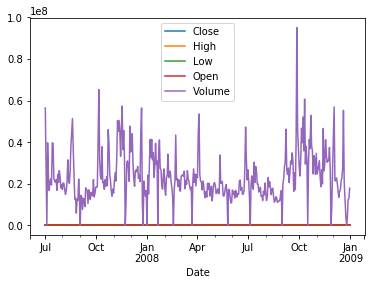

In [76]:
bb.plot()  # Can't see the x-axis labels

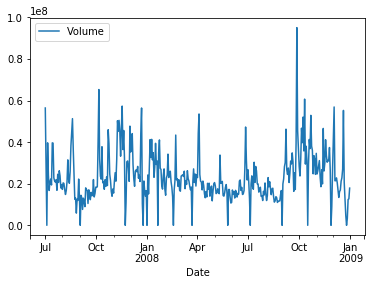

In [86]:
bb.plot(y = "Volume")

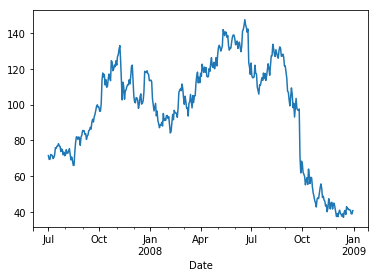

In [80]:
bb["Close"].plot()  # alternative syntax rather than as a whole just series

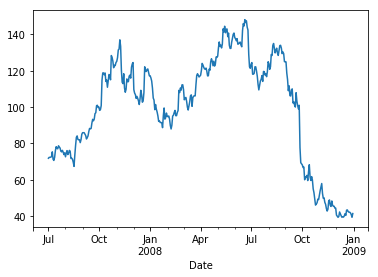

In [83]:
bb["High"].plot(x = "Date")

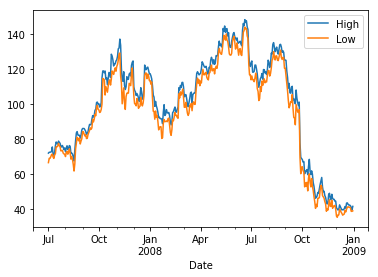

In [85]:
bb[["High", "Low"]].plot()  # List within list

## Modifying matplotlib Aesthetics
Has lots of templates: plt.style.available
plt.style.use(style = "fivethirtyeight")

In [87]:
# Trying data instead of web. NO DIFFERENCE!
#data.DataReader(name = "BBRY", data_source = "morningstar", 
#                start = "2007-07-01", end = "2008-12-31")

bb = web.DataReader(name = "BBRY", data_source = "morningstar", 
            start = "2007-07-01", end = "2008-12-31")
bb.reset_index(level = 0, drop = True, inplace = True)
bb.head()

,Close,High,Low,Open,Volume
Date,,,,,
2007-07-02,71.4200,71.8000,66.3567,67.3233,56422755
2007-07-03,69.3133,72.2967,68.8000,69.3867,26506620
2007-07-04,69.3133,72.2967,68.8000,69.3867,0
2007-07-05,72.0633,72.4333,69.6700,72.1533,39655791
2007-07-06,71.7833,72.6667,70.8667,71.5900,24100500


In [88]:
# available templates
plt.style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10']

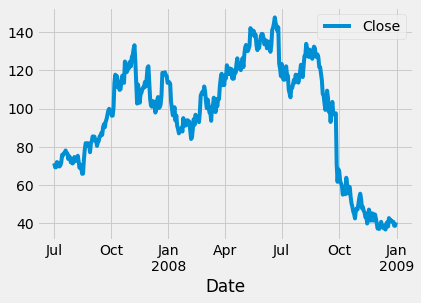

In [90]:
plt.style.use(style = "fivethirtyeight")
bb.plot(y = "Close")

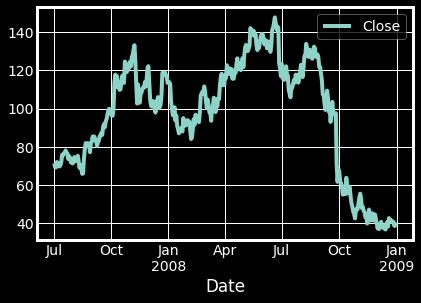

In [92]:
plt.style.use(style = "dark_background")
bb.plot(y = "Close")

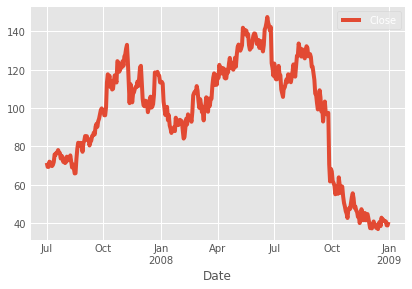

In [94]:
plt.style.use(style = "ggplot") # You call it once it will be saved
bb.plot(y = "Close")

## Bar Charts
Good for when you want to plot a count. Good for series.

In [121]:
google = web.DataReader(name = "GOOG", data_source = "morningstar",
               start = "2004-01-01", end = "2017-12-31")
google.head()

Close      High       Low      Open  Volume
Symbol Date                                                      
GOOG   2014-03-27  556.9312  566.4451  551.4064  566.4451   13087
       2014-03-28  558.4570  564.8794  557.1406  559.7136   41115
       2014-03-31  555.4453  565.4478  555.4054  565.3381   10801
       2014-04-01  565.6074  566.8939  557.1805  557.1805    7953
       2014-04-02  565.4478  603.1743  560.6510  579.1702  147099

In [119]:
# Let's say I want to rank the performance of the stock
# need to write function then use .apply()

def rank_performance(stock_price):
    if stock_price <= 700:
        return "Poor"
    elif stock_price > 700 and stock_price <= 900:
        return "Satisfactory"
    else:
        return "Stellar"

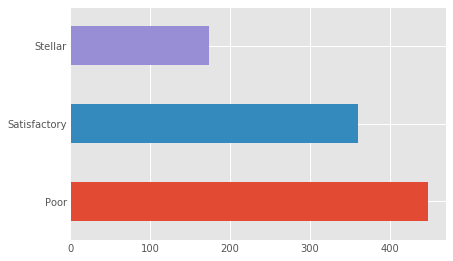

In [127]:
# Then we want to apply our function to the Close series
# Extract the series first then pass it through function
# kind = "line", "bar", "barh", etc.
google["Close"].apply(func = rank_performance).value_counts().plot(kind = "barh")

## Pie Charts

In [133]:
apple = web.DataReader(name = "AAPL", data_source = "morningstar", 
              start = "2012-01-01", end = "2016-12-31")
apple.head()

Close     High      Low     Open    Volume
Symbol Date                                                    
AAPL   2012-01-02  57.8571  57.8571  57.8571  57.8571         0
       2012-01-03  58.7471  58.9286  58.4286  58.5000  75564699
       2012-01-04  59.0629  59.2400  58.4686  58.6000  65061108
       2012-01-05  59.7186  59.7929  58.9529  59.2786  67816805
       2012-01-06  60.3429  60.3929  59.8886  59.9671  79596412

In [137]:
# Customized function. Let's say we want to compare the stock price 
# at the end of each day to Apple's stock average.
# Average stock performance

aapl_avg = apple["Close"].mean()

# Let's clasify the stock above/below average
def rank_performance(stock_price):
    if stock_price >= aapl_avg:
        return "Above average"
    else:
        return "Below average"

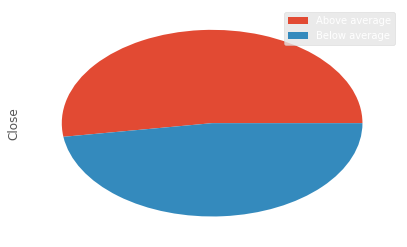

In [142]:
apple["Close"].apply(func = rank_performance).value_counts().plot(kind = "pie", legend = True)

## Histograms
Good for showing a distribution or how the data is spread out. Think of bins. .plot(kind = "hist")

In [143]:
google = web.DataReader(name = "GOOG", data_source = "morningstar",
               start = "2004-01-01", end = "2017-12-31")
google.head()

Close      High       Low      Open  Volume
Symbol Date                                                      
GOOG   2014-03-27  556.9312  566.4451  551.4064  566.4451   13087
       2014-03-28  558.4570  564.8794  557.1406  559.7136   41115
       2014-03-31  555.4453  565.4478  555.4054  565.3381   10801
       2014-04-01  565.6074  566.8939  557.1805  557.1805    7953
       2014-04-02  565.4478  603.1743  560.6510  579.1702  147099

In [144]:
def custom_round(stock_price):
    return int(stock_price / 100.0) * 100

In [145]:
custom_round(55.5)

0

In [146]:
custom_round(111.33)

100

In [147]:
custom_round(449.12)

400

In [152]:
# Sort_index() orders/sorts your "bins"
google["High"].apply(func = custom_round).value_counts().sort_index()

400       1
500     339
600      89
700     285
800      93
900     129
1000     46
Name: High, dtype: int64

In [155]:
# nunique() does a countd basically of your unique values
google["High"].apply(func = custom_round).nunique()

7

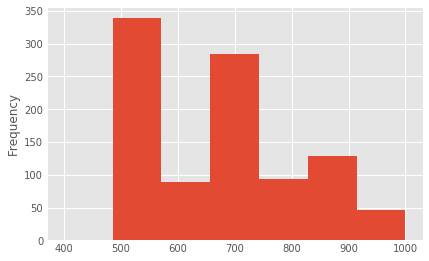

In [158]:
google["High"].apply(func = custom_round).plot(kind = "hist", bins = 7)